Starting OXH plot
63735


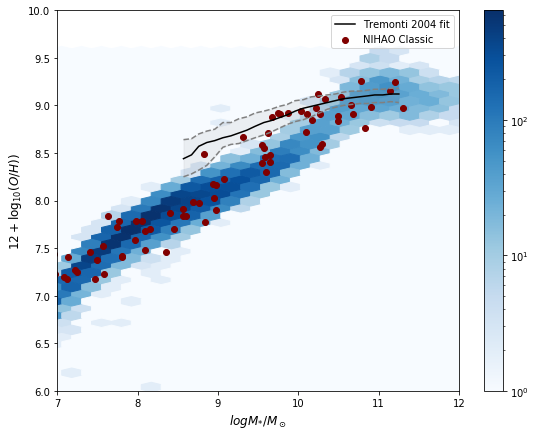

<Figure size 432x288 with 0 Axes>

In [3]:
import numpy as np
import pynbody
import pynbody.filt as filt
import pynbody.units as units
import pynbody.analysis.profile as profile
import matplotlib.pyplot as plt
import sys, os, glob, pickle, struct
import plot_tools
import make_plots

#entries = pickle.load(open("sorted_data_inc.p","rb"))

data_dir = "/scratch/hc2347/pickles/60/CENTER60"

pickle_files = glob.glob(data_dir+"*.p")

pickle_files.sort()

entry = plot_tools.load_halos_pickle(pickle_files[0])
entry["zred"] = 0.2

print("Starting OXH plot")
make_plots.plot_oxh(entry['oxh'], entry['mstar'])

# z_star, m_star = plot_tools.do_filter(entry['z_star'],entry['mstar'])
# make_plots.plot_stellar_metallicity(z_star, m_star)